In [21]:
#importing required libraries
import yfinance as yf
import pandas as pd
import os


In [22]:
#Defining ticker and period for which stock we want to fetch the STOCK_PRICES
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-05-12"

#Here we are fetching the stock details for the time period mentioned above
data = yf.download(ticker,start= start_date, end= end_date)

#printing the fetched data/stock prices
print (data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.347923   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.634842   
2020-01-06   73.447502   74.989998   73.187500   74.949997   73.213631   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.869293   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.041489   
...                ...         ...         ...         ...         ...   
2023-05-05  170.979996  174.300003  170.759995  173.570007  173.330261   
2023-05-08  172.479996  173.850006  172.110001  173.500000  173.260345   
2023-05-09  173.050003  173.539993  171.600006  171.770004  171.532745   
2023-05-10  173.020004  174.029999  171.899994  173.559998  173.320267   
2023-05-11  173.850006  174.589996  172.169

In [23]:
#Creating the dataframe
df=pd.DataFrame(data)

In [24]:
#the first 5 rows of data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347923,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634842,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213631,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869293,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041489,132079200


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 846 entries, 2020-01-02 to 2023-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       846 non-null    float64
 1   High       846 non-null    float64
 2   Low        846 non-null    float64
 3   Close      846 non-null    float64
 4   Adj Close  846 non-null    float64
 5   Volume     846 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 46.3 KB


In [26]:
#as we do not have index so program is taking date 
#as a index that is why here we taking date as a date .
df['date']=pd.to_datetime(df.index)

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347923,135480400,2020-01-02
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634842,146322800,2020-01-03
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213631,118387200,2020-01-06
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869293,108872000,2020-01-07
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041489,132079200,2020-01-08


In [28]:
##importing required library.
import plotly.graph_objects as go

#creating candlestick
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

#customizing the chart layout
fig.update_layout(
    title='Stock Price Chart AAPL',
    yaxis_title='Price ($)',
    xaxis_rangeslider_visible=False)

#display the chart
fig.show()

In [29]:
#Drops date and volume from dataframe
df.drop(['date','Volume'], axis=1 , inplace=True)

In [30]:
#after droping date and volume , here we reset the index
df.reset_index(drop=True,inplace=True)

<Axes: >

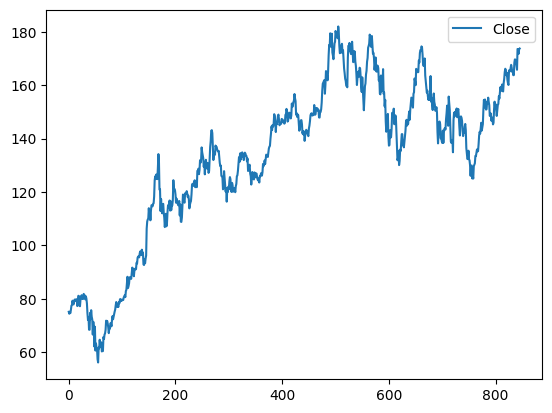

In [31]:
df.plot.line(y="Close", use_index=True)

In [32]:
#importing required libraries for training data
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Open', 'Close' , 'High' , 'Low' ,'Adj Close']]
y = df['Close']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse =mean_squared_error(y_test,y_pred)
print("Mean Squarred Error :",mse)

Mean Squarred Error : 0.0955099639176713


In [33]:
##importing required library for prediction
import numpy as np
#values to predict the stock price 
new_data = np.array([[173.85006,174.589996,172.1669998,173.750000,173.750000]])

#Make prediction using the trained model
predicted_price = rf.predict(new_data)

#print the predicted stock price
print('Predicted stock price :', predicted_price[0])

Predicted stock price : 174.48210037231445


c:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [34]:
df.tail()

,Open,High,Low,Close,Adj Close
841,170.979996,174.300003,170.759995,173.570007,173.330261
842,172.479996,173.850006,172.110001,173.500000,173.260345
843,173.050003,173.539993,171.600006,171.770004,171.532745
844,173.020004,174.029999,171.899994,173.559998,173.320267
845,173.850006,174.589996,172.169998,173.750000,173.510010
